# 1. Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = "/content/drive/MyDrive/"

# 2. Loading the dataset

In [2]:
df=pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum().sum()

0

# 3. Train/test splitting and normalization

In [4]:
data_features = list(df.columns)
data_features.remove('diagnosis')
data_features.remove('id')
data_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [5]:
X = df[data_features]
y = df['diagnosis']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=40)
print(X_train.shape)
print(X_test.shape)

(398, 30)
(171, 30)


# 4. Accuracy report function

In [6]:
def accuracy_report(y_test,y_pred):
  cm = confusion_matrix(y_test, y_pred)
  acc_report = {}
  labels = np.unique(y_test)
  AA = 0
  for label in labels:
    per_class_acc = cm[label,label]/np.sum(cm[label,:])*100
    acc_report["class "+str(label)] = per_class_acc
    AA+=per_class_acc
  AA = AA/len(labels)

  acc_report["OA"] = accuracy_score(y_test,y_pred)*100
  acc_report["AA"] = AA

  return acc_report

# 5. SVM Classification

## 5.1. SVM with Polynomial Kernel

### 5.1.1. Cross-validation Grid Search

#### a. Wide parameters search

In [7]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma':[1, 0.1, 0.01, 0.001, 0.0001],
    'degree': [1, 2, 4, 8, 16, 32],
    'kernel':['poly']
}

grid = GridSearchCV(SVC(), param_grid)

search_results = grid.fit(X_train, y_train)

print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100),"%")

Best params {'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Best CV score 97.4873 %


#### b. Refined parameters search

In [10]:
param_grid = {
    'C': np.arange(0.1,10, 0.1),
    'gamma':np.arange(0.1, 3, 0.1),
    'degree': np.arange(2, 4, 1),
    'kernel':['poly']
}

grid = GridSearchCV(SVC(), param_grid)

search_results = grid.fit(X_train, y_train)

print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100),"%")

Best params {'C': 0.2, 'degree': 2, 'gamma': 2.2, 'kernel': 'poly'}
Best CV score 97.4873 %


### 5.1.2. Classification

In [11]:
C =search_results.best_params_['C']
gamma = search_results.best_params_['gamma']
degree = search_results.best_params_['degree']

svm = SVC(kernel='poly', C=C, gamma = gamma, degree = degree)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_report = accuracy_report(y_test, y_pred)

for key in acc_report :
    print(key, "=", "{:.2f}".format(acc_report[key]),"%")

class 0 = 99.13 %
class 1 = 98.21 %
OA = 98.83 %
AA = 98.67 %


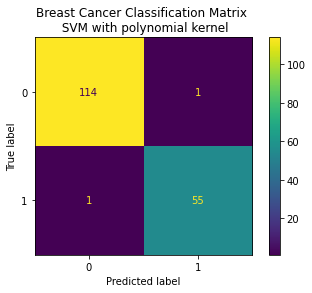

In [13]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =svm.classes_)
disp.plot()
plt.title("Breast Cancer Classification Matrix \n SVM with polynomial kernel")
plt.show()

## 5.2. SVM with RBF Kernel

### 5.2.1. Cross-validation Grid Search

#### a. Wide parameters search

In [27]:
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma':[2, 1, 0.1, 0.01, 0.001, 0.0001],
    'degree': [ 2, 4, 8, 16, 32],
    'kernel':['rbf']
}

grid = GridSearchCV(SVC(), param_grid)

search_results = grid.fit(X_train, y_train)

print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100),"%")

Best params {'C': 10, 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}
Best CV score 96.9905 %


#### b. Refined parameters search

In [31]:
param_grid = {
    'C': np.arange(1,20, 0.1),
    'gamma':np.arange(0.1, 2, 0.1),
    'degree': np.arange(2, 4, 1),
    'kernel':['rbf']
}

grid = GridSearchCV(SVC(), param_grid)

search_results = grid.fit(X_train, y_train)

print("Best params", search_results.best_params_)
print("Best CV score", "{:.4f}".format(search_results.best_score_*100),"%")

Best params {'C': 2.200000000000001, 'degree': 2, 'gamma': 1.0, 'kernel': 'rbf'}
Best CV score 97.4873 %


### 5.2.2. Classification

In [32]:
C =search_results.best_params_['C']
gamma = search_results.best_params_['gamma']
degree = search_results.best_params_['degree']

svm = SVC(kernel='rbf', C=C, gamma = gamma, degree = degree)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
acc_report = accuracy_report(y_test, y_pred)

for key in acc_report :
    print(key, "=", "{:.2f}".format(acc_report[key]),"%")

class 0 = 99.13 %
class 1 = 98.21 %
OA = 98.83 %
AA = 98.67 %


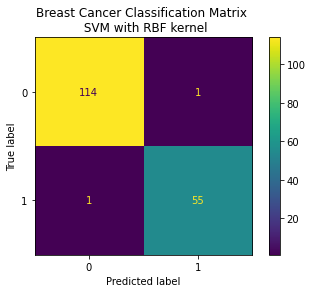

In [34]:
cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =svm.classes_)
disp.plot()
plt.title("Breast Cancer Classification Matrix \n SVM with RBF kernel")
plt.show()